In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import csv
import matplotlib.patches as mpatches
import pylab as pb
import matplotlib.ticker as mtick
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
from skimage.io import imread
from matplotlib import cm as cm

In [2]:
x1 = []
y1 = []
z1 = []
a1 = []
b1 = []
c1 = []
d1 = []
e1 = []


with open('4L_EDX_spectra.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        x1.append(float(row[0]))
        y1.append(float(row[1]))
        z1.append(float(row[2]))
        a1.append(float(row[3]))
        b1.append(float(row[4]))
        c1.append(float(row[5]))
        d1.append(float(row[6]))

In [44]:
x3 = []
S_0_sec = []
O_0_sec = []
S_6_sec = []
O_6_sec = []
S_10_sec = []
O_10_sec = []



with open('4L_histograms.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        x3.append(float(row[0]))
        S_0_sec.append(float(row[1]))
        O_0_sec.append(float(row[2]))
        S_6_sec.append(float(row[3]))
        O_6_sec.append(float(row[4]))
        S_10_sec.append(float(row[5]))
        O_10_sec.append(float(row[6]))

In [8]:
f = []
f1 = []



with open('4L_EDX_fit.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        f.append(float(row[0]))
        f1.append(float(row[1]))
     

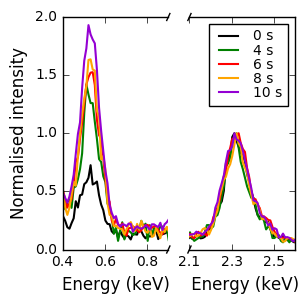

In [5]:
import matplotlib.pylab as plt
import numpy as np


f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w', figsize = (3,3))

# plot the same data on both axes
ax.plot(x1,y1, color='black', linestyle='-', linewidth=1.5, label = '0 s' )
#ax.plot(x1,z1, color='blue', linestyle='-', linewidth=1.5, label = '2 s')
ax.plot(x1,a1, color='g', linestyle='-', linewidth=1.5, label = '4 s')
ax.plot(x1,b1, color='red', linestyle='-', linewidth=1.5, label = '6 s')
ax.plot(x1,c1, color='orange', linestyle='-', linewidth=1.5, label = '8 s')
ax.plot(x1,d1, color='darkviolet', linestyle='-', linewidth=1.5, label = '10 s')

ax2.plot(x1,y1, color='black', linestyle='-', linewidth=1.5, label = '0 s' )
#ax2.plot(x1,z1, color='blue', linestyle='-', linewidth=1.5, label = '2 s')
ax2.plot(x1,a1, color='g', linestyle='-', linewidth=1.5, label = '4 s')
ax2.plot(x1,b1, color='red', linestyle='-', linewidth=1.5, label = '6 s')
ax2.plot(x1,c1, color='orange', linestyle='-', linewidth=1.5, label = '8 s')
ax2.plot(x1,d1, color='darkviolet', linestyle='-', linewidth=1.5, label = '10 s')

ax.set_xlim(0.4,0.9)  # outliers only
ax2.set_xlim(2.1, 2.6)  # most of the data
ax.set_ylim(0,2)  # outliers only
ax2.set_ylim(0, 2) 

major_ticks_1 = np.arange(0.4, 0.9, 0.2)   
ax.set_xticks(major_ticks_1) 
major_ticks_2 = np.arange(2.1, 2.6, 0.2)   
ax2.set_xticks(major_ticks_2) 

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')

ax2.yaxis.tick_right()

ax.set_ylabel('Normalised intensity', fontsize = 12)
ax.set_xlabel('Energy (keV)', fontsize = 12)
ax2.set_xlabel(' Energy (keV)', fontsize = 12)
plt.setp(ax2.get_yticklabels(), visible=False, fontsize = 12)
# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

f.subplots_adjust(hspace=0.1)
ax2.legend(loc = 'upper right',labelspacing=0.01, fontsize = 10)



plt.savefig("4L_EDX.png", bbox_inches='tight',dpi = 300)
plt.show()
plt.show()

In [6]:
t = [0,4,6,8,10]
r = [0.5,1.3,1.5,1.6,1.9]

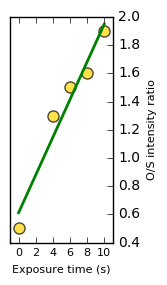

In [9]:
fig = plt.figure(figsize=(1.8,3))

axes = fig.add_subplot(111)

axes.set_xlabel('Exposure time (s)', fontsize = 8)
axes.set_ylabel('O/S intensity ratio', fontsize = 8)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
axes.grid('off')
axes.set_xlim([-1,11])
axes.yaxis.set_label_position("right")
axes.yaxis.tick_right()
#major_ticks_1 = np.arange(0, 8,2 )   
#axes.set_xticks(major_ticks_1)  
#major_ticks_2 = np.arange(10, 35,10 )   
#axes.set_yticks(major_ticks_2)  
plt.tight_layout()
axes.plot(t,r, ls = 'none',c = "gold", marker = 'o', alpha=0.7, mfc='gold', mew = '1', mec = 'black',markersize = 8, label = '0 s' )
axes.plot(f,f1, c = "g", linestyle = '-',lw = 2,alpha=1, mfc='green', mew = '0.5', markersize = 8, label = '0 s' )
plt.savefig("4L_EDX_inset.png", bbox_inches='tight', dpi = 300)

plt.show()

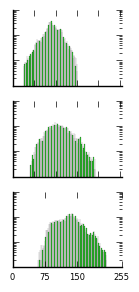

In [57]:
fig = plt.figure(figsize=(1.5,3))

ax1 = fig.add_subplot(311)
ax1.set_yscale("log")
ax1.bar(x3,O_0_sec, color = "limegreen", lw=0.11)

ax2 = fig.add_subplot(312)
ax2.set_yscale("log")
ax2.bar(x3,O_6_sec, color ='limegreen', lw=0.11)

ax3 = fig.add_subplot(313)
ax3.set_yscale("log")
ax3.bar(x3,O_10_sec, color = 'limegreen', lw=0.11)



plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=True, fontsize = 6)
major_ticks_1 = [0,75,150,255]  
ax3.set_xticks(major_ticks_1)  

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)


ax1.set_xlim([0,255])
ax2.set_xlim([0,255])
ax3.set_xlim([0,255])

plt.tight_layout()
plt.savefig("4L_EDX_histograms.png", bbox_inches='tight',dpi = 300)
plt.show()